In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from dotenv import load_dotenv

# .env 파일에서 환경 변수 불러오기
load_dotenv()

os.environ['KAGGLE_USERNAME'] = load_dotenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = load_dotenv('KAGGLE_KEY')

!kaggle datasets download -d danielshanbalico/dog-emotion
!unzip '*.zip'
import os
import shutil

#데이터셋 경로 설정
base_dir = './Dog Emotion'
emotions = ['happy', 'sad', 'relaxed', 'angry']

dog_emotion_image_paths = [
    "./Dog Emotion/angry/1MLMzBLgXPxaPHQRgs2Ws2UQJJZsaG300.jpg",
    "./Dog Emotion/happy/1KdEGoZwPog5YjCMf2TiptauslILYK862.jpg",
    "./Dog Emotion/relaxed/5w99R5w6itKwypP8lZcwF0kBgEFgk117.jpg",
    "./Dog Emotion/sad/87PgHZO1gUR6BShuNoVPV5q3BT8Qru535.jpg",
    "./Dog Emotion/angry/0C5yo7GxMy8lztxNZvSdfEx2gSPRTR701.jpg",
    "./Dog Emotion/angry/16heO5kSK7rXDMjxWdswQGMHmWLkiJ361.jpg",
    "./Dog Emotion/angry/90wipLCXJtLA7cnQd6bvmhan5rz0wa450.jpg",
    "./Dog Emotion/angry/Bgmy6C9TzlMUI5e9VolOCZ5iwPb9Ja908.jpg",
    "./Dog Emotion/happy/2D8jUt58l5H0Dqfbes9UA7EEghaB3X938.jpg",
    "./Dog Emotion/happy/5yAlsv3IimyvT8C0gAgXXNU1uBSQnZ585.jpg",
    "./Dog Emotion/happy/7wtAldaKufBGVytNP9CvgdinnZhXZM973.jpg",
    "./Dog Emotion/happy/8SmgZZqiQ6troZHgPnONXgynxgk5zh596.jpg",
    "./Dog Emotion/relaxed/4HmVsQVi27h2zzxwC5mampFdOxXm9G314.jpg",
    "./Dog Emotion/relaxed/7vCNBl3m01YIiZhHtVPVYevbXH4IEf757.jpg",
    "./Dog Emotion/relaxed/9jcd0i2f1uGagos09yFc1Me5O6KF6r260.jpg",
    "./Dog Emotion/relaxed/BnYdQ0vJAgJMCKnpewM0vPNhQyJrC397.jpg",
    "./Dog Emotion/sad/AcqIMIe0EO85n5kad3LIgRWPOH23i6330.jpg",
    "./Dog Emotion/angry/3gNqRVAOOxGGxL64hG2fXa2apwIDio797.jpg",
    "./Dog Emotion/angry/5g5AGokiT61EY835V5hVux1DPsrMRu868.jpg",
    "./Dog Emotion/angry/62jTtCF0xpxlcsEtWt6qgQDK6aEyqZ229.jpg",
    "./Dog Emotion/angry/8npDb0wmbM4M3hdXavCWLgDXcQFGJ2160.jpg",
    "./Dog Emotion/angry/8tiQoVNWOx3ygVruJoCMux0Gopp1JN827.jpg",
    "./Dog Emotion/happy/70zKm35WFPLrECn5Y5meeTyvLVnCTx610.jpg",
    "./Dog Emotion/sad/1MpwUJ9k2oN6BRmFiONKNsoaNeJSph109.jpg",
    "./Dog Emotion/angry/0C5yo7GxMy8lztxNZvSdfEx2gSPRTR701.jpg",
    "./Dog Emotion/angry/6NKqxeoP89Np9ZsJ59Et3Y1w6tcXmN685.jpg",
    "./Dog Emotion/angry/CqY5OuVFRXFD4nBp7PkDDYbsp8RD3w344.jpg",
    "./Dog Emotion/happy/08mrG3hgF3M4bmy65ZJZBmYulhJ1es699.jpg",
    "./Dog Emotion/happy/45Y79sLK0NVKa6lR8r3lJWJgsF7679994.jpg",
    "./Dog Emotion/relaxed/AfA4EDeh9hHLhO2XYpFX49g8YO4P9w632.jpg",
    "./Dog Emotion/sad/1MpwUJ9k2oN6BRmFiONKNsoaNeJSph109.jpg",
    "./Dog Emotion/sad/5zNmNnqwcJKWKLcRRdODiW6NvRf29A226.jpg",
    "./Dog Emotion/angry/1uhQzgHPPAF1xGTS9fiquWOc3kn3hC887.jpg",
    "./Dog Emotion/angry/BJJI9j4I3XCBdLphUN8XDg1nFz9Woq834.jpg",
    "./Dog Emotion/relaxed/1sXWUBQdj17sdeVt6Rt2NleQvAz3lY631.jpg",
    "./Dog Emotion/angry/6gXpX9sOFx5FPp8W29lde9rwdhr239280.jpg",
    "./Dog Emotion/angry/CDhGC09FlzKD7BmbUEj3tng0dl5mU2140.jpg",
    "./Dog Emotion/happy/81abPg9epvVT46sTl0MudaEejz7YPC891.jpg",
    "./Dog Emotion/sad/6RocDWbOIYax0cS4OTu0oQ2HCmcuv5288.jpg",
    "./Dog Emotion/sad/6hfYckJMO9XkVcV0jM77H7RcS25J3p972.jpg",
    "./Dog Emotion/sad/8FM9t1TewJ0BstPBwju5NfCv8otgVy560.jpg",
    "./Dog Emotion/sad/ATpwWSngW2sa9bYuf84sjaWgU4z9CX443.jpg",
    "./Dog Emotion/angry/1OIYiVdFbBN5bnKkFGCbLyBcuUrpww110.jpg",
    "./Dog Emotion/angry/5DWzqxajUJNaBkU8R0ieS2tTT6w7B7495.jpg",
    "./Dog Emotion/angry/9zCJwj46EZ8c1MTuY1jZr9qxJWuSva482.jpg",
    "./Dog Emotion/happy/6tjrEh4YUWqA6bqHWq2X4zXmyn8Nu0768.jpg",
    "./Dog Emotion/relaxed/1XR0Z1GXt8hQutLY7c14bxp9BzT2jJ883.jpg",
    "./Dog Emotion/angry/1uhQzgHPPAF1xGTS9fiquWOc3kn3hC887.jpg",
    "./Dog Emotion/angry/6wio62J04Zs99DWDtowrYX8ROnJ24j561.jpg",
    "./Dog Emotion/angry/BJJI9j4I3XCBdLphUN8XDg1nFz9Woq834.jpg",
    "./Dog Emotion/relaxed/1sXWUBQdj17sdeVt6Rt2NleQvAz3lY631.jpg",
    "./Dog Emotion/relaxed/4CUGFwEnHw9FwuvqCAn5agpjZ9ziYv307.jpg",
    "./Dog Emotion/sad/09qhORmLRHfy6HgNlXTDlqJVk1NJod130.jpg"
]

# 중복 제거된 파일 경로 리스트
unique_file_paths = list(set(dog_emotion_image_paths))
print(len(unique_file_paths))
for file_path in unique_file_paths:
    full_path = os.path.join('.', file_path)  # Colab 환경에서의 경로 조정
    try:
        if os.path.exists(full_path):
            os.remove(full_path)
        else:
            print(f"File not found: {full_path}")
    except Exception as e:
        print(f"Error deleting file {full_path}: {e}")

# Train, Validation 데이터셋 분리
train_datagen = ImageDataGenerator(
    validation_split=0.2,  # 20%를 검증 데이터로 사용
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='training',  # 학습 데이터 부분
    shuffle = True,
    seed = 42
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # 검증 데이터 부분
    shuffle = True,
    seed = 42
)


'''
처음 학습에서는 처음레이어부터 뒤에서 150번째 레이어까지는 학습 동결을 하고 학습을 진행.
그 이후
동결킨 레이어를 동결 해제한 후, 낮은 학습률로 전체 레이어층을 다시 학습. 

'''


# InceptionResNetV2 모델
base_model = InceptionResNetV2(weights='imagenet', include_top=False)

# 새로운 출력 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# InceptionResNetV2 모델 층들을 동결
for layer in base_model.layers[:-150]:
    layer.trainable = False

# 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30
)


# InceptionResNetV2의 모델 층들을 동결 해제
for layer in base_model.layers[:-150]:
    layer.trainable = True

# 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30
)

# 모델 평가
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


100% 155M/155M [00:01<00:00, 139MB/s]
100% 155M/155M [00:01<00:00, 120MB/s]
Archive:  dog-emotion.zip
  inflating: Dog Emotion/angry/09dUVMcjCDfOtbeYDQg5Fvu3GPHWJg811.jpg  
  inflating: Dog Emotion/angry/0AvKtuzA7LfxnKaO0bey9mQMLnxXad73.jpg  
  inflating: Dog Emotion/angry/0C5yo7GxMy8lztxNZvSdfEx2gSPRTR701.jpg  
  inflating: Dog Emotion/angry/0C9jEgFQHsh36W5U2u5CA98lB7C5eX806.jpg  
  inflating: Dog Emotion/angry/0RXraPIKC00Dz1qkuMbj8XbuR80g5Z893.jpg  
  inflating: Dog Emotion/angry/0TSpHUDh1xIQthYrtH8E1UZQ72rcTZ68.jpg  
  inflating: Dog Emotion/angry/0aNyXBrmNA7XdefwHvgO2n1rnpqQAp885.jpg  
  inflating: Dog Emotion/angry/0dWl0dRT9Pc98fjFSvGOXlGlE0B4E6267.jpg  
  inflating: Dog Emotion/angry/0da4j6Ehkb6Ml0YBRiWmsBU2wEMoXP409.jpg  
  inflating: Dog Emotion/angry/0jgI6KwR6IGvq9CAMBB3srLRa0W7z7192.jpg  
  inflating: Dog Emotion/angry/0nhvFJW7Q5S48PygRMOimUipiYweig911.jpg  
  inflating: Dog Emotion/angry/0qqRaCQQtAQj2PGIRQrNJa1rnnx36W620.jpg  
  inflating: Dog Emotion/angry/0rAH60FVXqnFBJPzG

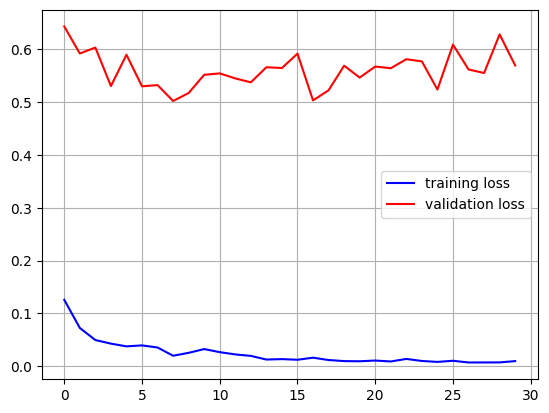

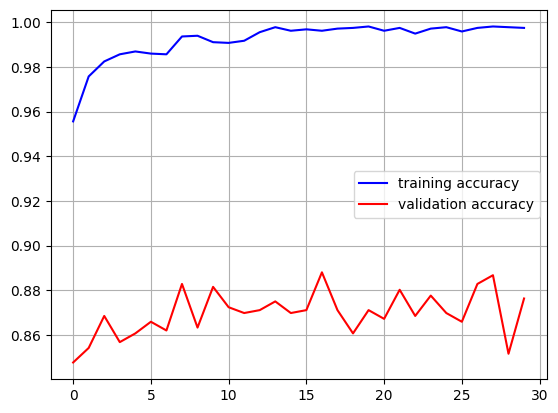

In [ ]:
import matplotlib.pyplot as plt
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
accuracy = hist_dict['accuracy']
val_accuracy = hist_dict['val_accuracy']

plt.plot(loss, 'b', label='training loss')
plt.plot(val_loss, 'r', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(accuracy, 'b', label='training accuracy')
plt.plot(val_accuracy, 'r', label='validation accuracy')
plt.legend()
plt.grid()

plt.show()